# Austrelia "WildFire" Data Analysis

In [2]:
# %pip install seaborn
# %pip install folium

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [5]:
df = pd.read_csv("C:\\Users\\User\\Desktop\\Machine Learning Coursera\\Datasets\\Historical_Wildfires.csv")
print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [6]:
df.head(2)

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,01-04-2005,8.68000,312.266667,42.4000,78.666667,2.886751,8.333333,3,R
1,NSW,01-05-2005,16.61125,322.475000,62.3625,85.500000,8.088793,65.428571,8,R


In [14]:
# df.info()

In [10]:
df['Date']=pd.to_datetime(df['Date'])
df['Year']=df['Date'].dt.year

In [15]:
df['Month']=df['Date'].dt.month
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26406 entries, 0 to 26405
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Region                               26406 non-null  object        
 1   Date                                 26406 non-null  datetime64[ns]
 2   Estimated_fire_area                  26406 non-null  float64       
 3   Mean_estimated_fire_brightness       26406 non-null  float64       
 4   Mean_estimated_fire_radiative_power  26406 non-null  float64       
 5   Mean_confidence                      26406 non-null  float64       
 6   Std_confidence                       24199 non-null  float64       
 7   Var_confidence                       24199 non-null  float64       
 8   Count                                26406 non-null  int64         
 9   Replaced                             26406 non-null  object        
 10  Year      

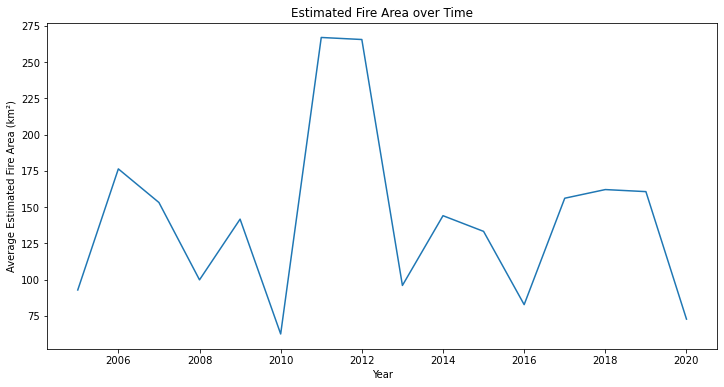

In [27]:
plt.figure(figsize=(12,6))
df_new = df.groupby('Year')['Estimated_fire_area'].mean()
df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel('Year')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

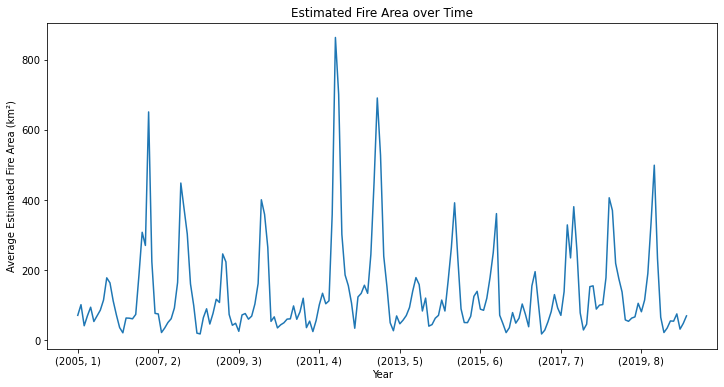

In [28]:
plt.figure(figsize=(12,6))
df_new = df.groupby(['Year','Month'])['Estimated_fire_area'].mean()
df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel('Year')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

In [29]:
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

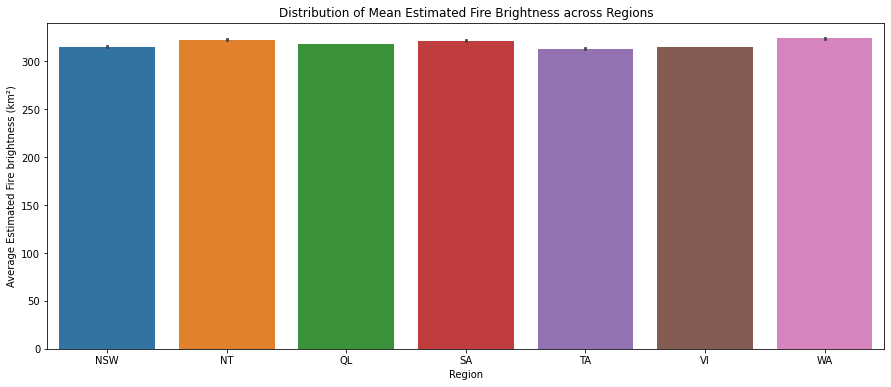

In [32]:
plt.figure(figsize=(15,6))
sns.barplot(data=df,x=df['Region'], y=df['Mean_estimated_fire_brightness'])
plt.xlabel('Region')
plt.ylabel('Average Estimated Fire brightness (km²)')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.show()

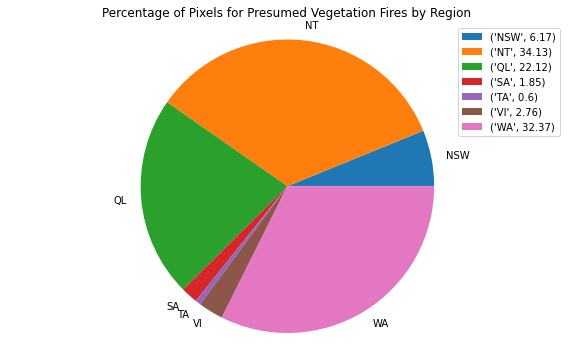

In [38]:
reg_sum = df.groupby('Region')['Count'].sum()
plt.figure(figsize=(10,6))
plt.pie(reg_sum,labels=reg_sum.index)
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.legend([(i,round(k/reg_sum.sum()*100,2)) for i,k in zip(reg_sum.index, reg_sum)])
plt.axis('equal')
plt.show()

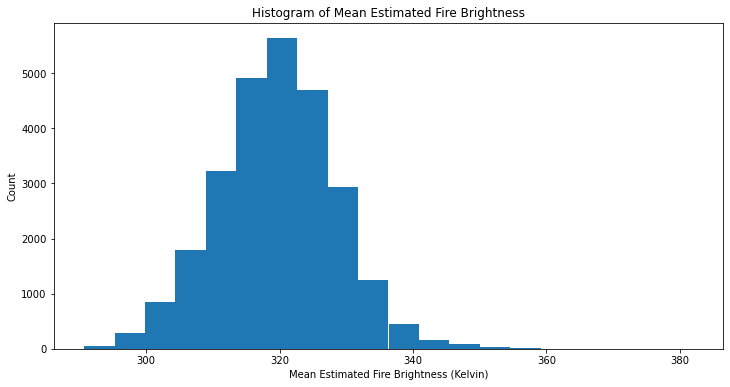

In [43]:
plt.figure(figsize=(12,6))
plt.hist(data = df, x='Mean_estimated_fire_brightness',bins=20)
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.show()

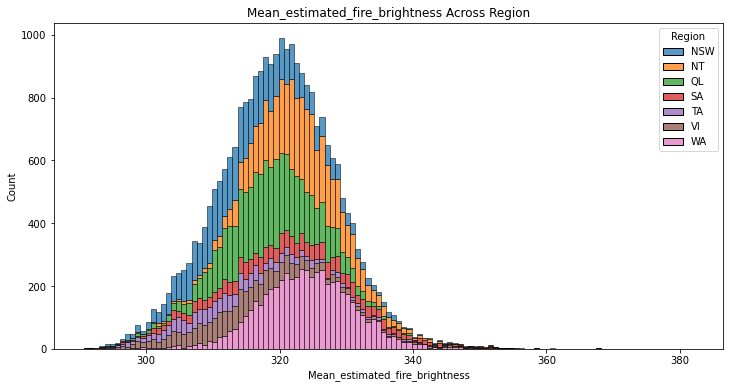

In [50]:
plt.figure(figsize=(12,6))
sns.histplot(hue='Region',x='Mean_estimated_fire_brightness',data=df,multiple='stack')
plt.xlabel('Mean_estimated_fire_brightness')
plt.title('Mean_estimated_fire_brightness Across Region')
plt.show()

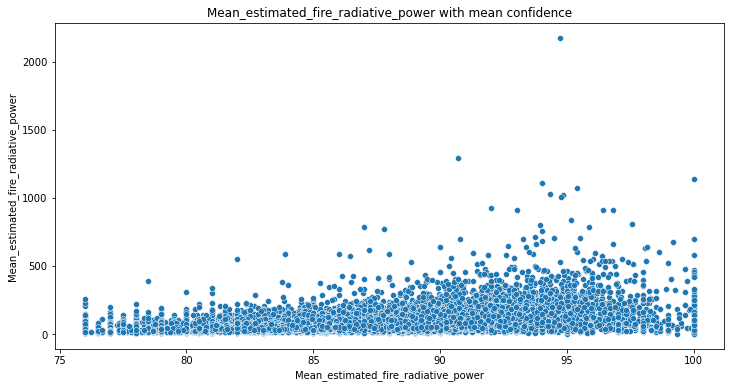

In [53]:
plt.figure(figsize=(12,6))
sns.scatterplot(y='Mean_estimated_fire_radiative_power',x='Mean_confidence',data=df)
plt.xlabel('Mean_estimated_fire_radiative_power')
plt.title('Mean_estimated_fire_radiative_power with mean confidence')
plt.show()

In [54]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [55]:
# instantiate a feature group 
aus_reg = folium.map.FeatureGroup()

# Create a Folium map centered on Australia
Aus_map = folium.Map(location=[-25, 135], zoom_start=4)

# loop through the region and add to feature group
for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    aus_reg.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            popup=lab,
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
Aus_map.add_child(aus_reg)